# display_data.ipynb
    - read and display model output from GoA simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xmitgcm as xm

In [2]:
# access the model output (phys_spinup)
run = 'phys_spinup'
# for the first 1 year (72 time slices)
model_iter = np.arange(960,960*72,960)
#
ds=xm.open_mdsdataset('/glade/campaign/univ/ugit0036/runs/'+run,iters=model_iter)

/glade/work/ito/miniconda3/envs/calc2/lib/python3.8/site-packages/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


In [3]:
# set the coordinates (lon, lat)
x = ds.XC.to_numpy()-360
y = ds.YC.to_numpy()

/glade/scratch/ito/ipykernel_224137/3020262795.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,sst,cmap='RdBu_r')


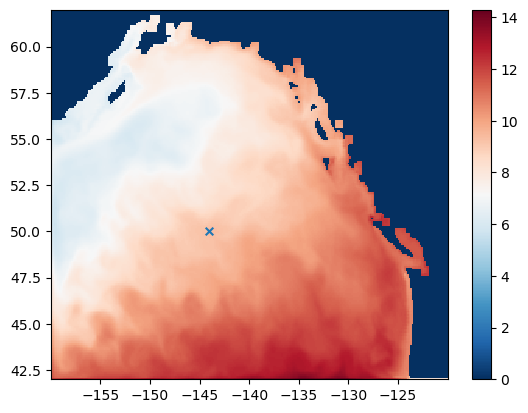

In [4]:
# plot SST
sst = ds.THETA.isel(Z=0).mean('time').to_numpy()
plt.pcolormesh(x,y,sst,cmap='RdBu_r')
plt.colorbar()
# place a dot for OSP
plt.scatter(-144,50,30,marker='x')
plt.show()

/glade/scratch/ito/ipykernel_224137/391782521.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,sst,cmap='RdBu_r')


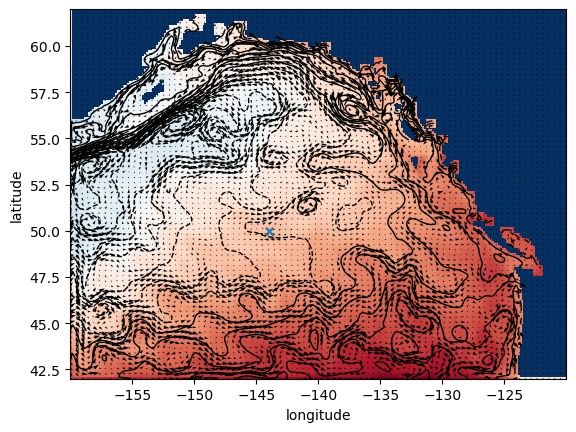

In [5]:
# plot SST, SSH and velocity together
eta = ds.ETAN.mean('time').to_numpy()
sst = ds.THETA.isel(Z=0).mean('time').to_numpy()
# set land values to NaN
eta[eta==0]=np.nan
# contour interval for SSH
cr=np.arange(-1,1,.05)
# color plot for SST
plt.pcolormesh(x,y,sst,cmap='RdBu_r')
# contour plot for SSH
plt.contour(x,y,eta,cr,linewidths=1,colors='k')
#
m=3
u = ds.UVEL.mean('time').sel(Z=slice(0,-150)).mean('Z').to_numpy()
v = ds.VVEL.mean('time').sel(Z=slice(0,-150)).mean('Z').to_numpy()
plt.quiver(x[::m],y[::m],u[::m,::m],v[::m,::m])
plt.xlabel('longitude')
plt.ylabel('latitude')
#
# place a dot for OSP
plt.scatter(-144,50,30,marker='x')
plt.show()

In [6]:
# time series
# plot a time series of SST, SSS and SSH (domain average)

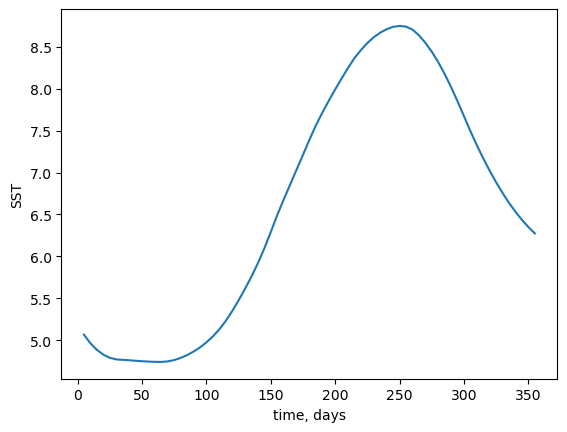

In [7]:
SST = ds.THETA.sel(Z=0,method='nearest').mean('XC').mean('YC').to_numpy()
time = np.arange(5,360,5)
plt.plot(time,SST)
plt.xlabel('time, days')
plt.ylabel('SST')
plt.show()